In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


# First we read the csv with the encoding ISO-8859-1 because it has special characters 

In [2]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## I see that it doesn't have a column name so I re-read the csv adding a name to the columns

In [3]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1',names=['feeling', 'id', 'date', 'query', 'user', 'tweet'])
df.head()

,feeling,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## I check if there is missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   feeling  1600000 non-null  int64 
 1   id       1600000 non-null  int64 
 2   date     1600000 non-null  object
 3   query    1600000 non-null  object
 4   user     1600000 non-null  object
 5   tweet    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## I check if there data is balanced

In [5]:
class_counts = df['feeling'].value_counts()
print(class_counts)

0    800000
4    800000
Name: feeling, dtype: int64


## I identify the most common words for each sentiment

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
train_pos_0 = df[df['feeling'] == 0]
target_0_df = train_pos_0['tweet']
train_pos = df[df['feeling'] == 4]
target_4_df = train_pos['tweet']

def count_most_common_words(dataframe, n):
    words = ' '.join(dataframe)
    all_tweets = " ".join(words.split())
    words = word_tokenize(all_tweets)
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(n)
    return most_common_words

most_common_words_target_0 = count_most_common_words(target_0_df, 10)  
most_common_words_target_4 = count_most_common_words(target_4_df, 10)  

print("Palabras más frecuentes para target 0:", most_common_words_target_0)
print("Palabras más frecuentes para target 4:", most_common_words_target_4)

## Since the most common token were punctuation mark I decide to tokenize only words using stopwords

In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

def count_most_common_words(dataframe, n):
    words = ' '.join(dataframe)
    all_tweets = " ".join(words.split())
    words = word_tokenize(all_tweets)
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(n)
    return most_common_words

df['clean_tweet'] = df['tweet'].apply(clean_text)

most_common_words_target_0 = count_most_common_words(df[df['feeling'] == 0]['clean_tweet'], 20)
most_common_words_target_4 = count_most_common_words(df[df['feeling'] == 4]['clean_tweet'], 20)
print("Palabras más frecuentes para target 0:", most_common_words_target_0)
print("Palabras más frecuentes para target 4:", most_common_words_target_4)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Palabras más frecuentes para target 0: [('go', 78830), ('get', 61302), ('work', 57976), ('day', 48916), ('miss', 47298), ('like', 42965), ('want', 40136), ('got', 38645), ('today', 37461), ('feel', 36688), ('back', 32942), ('ca', 31848), ('realli', 31321), ('time', 31153), ('im', 30095), ('good', 29223), ('still', 29041), ('one', 28476), ('sad', 27741), ('know', 27354)]
Palabras más frecuentes para target 4: [('good', 62080), ('love', 60204), ('go', 58778), ('day', 53332), ('thank', 50417), ('get', 48986), ('http', 47181), ('quot', 46970), ('like', 40250), ('lol', 34498), ('time', 33703), ('got', 32022), ('u', 30831), ('today', 29654), ('see', 28309), ('work', 28228), ('one', 27814), ('know', 26907), ('new', 26759), ('amp', 26313)]


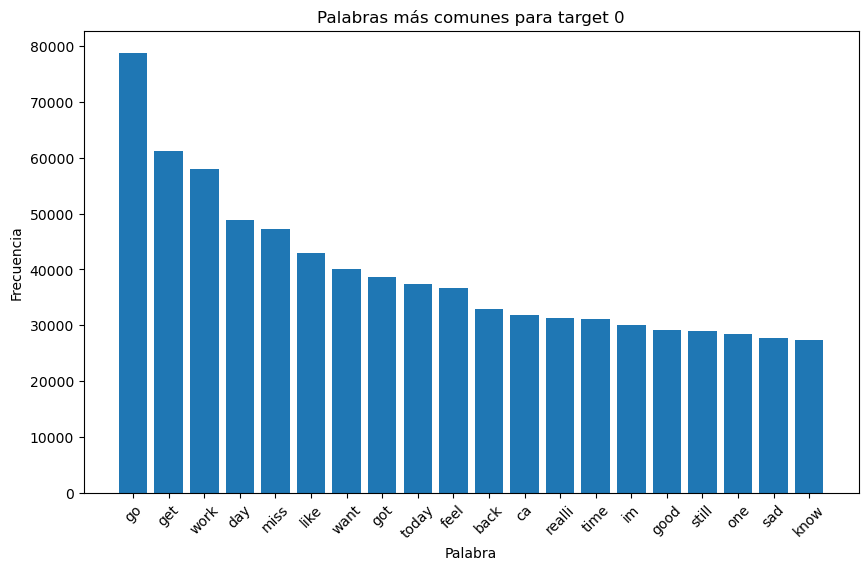

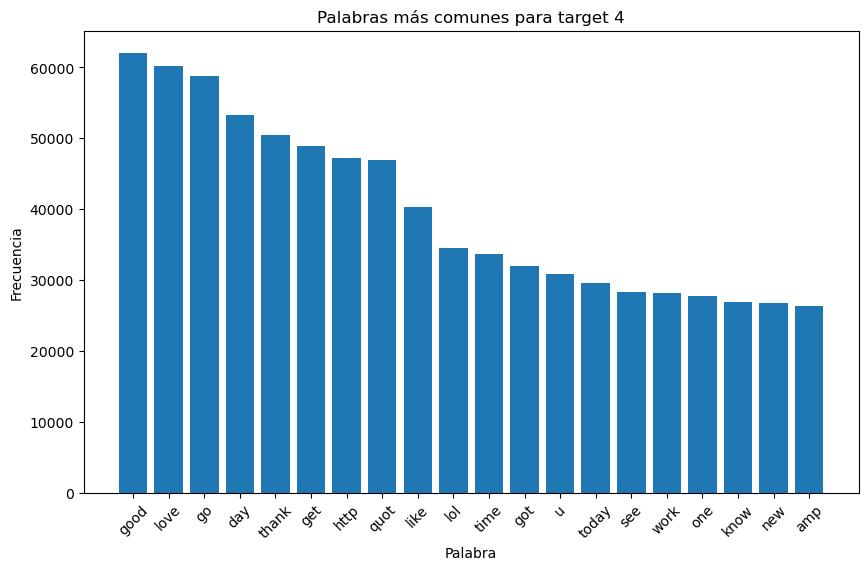

In [7]:
import matplotlib.pyplot as plt

def plot_word_frequencies(words_list, title):
    words, frequencies = zip(*words_list)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(most_common_words_target_0, 'Palabras más comunes para target 0')
plot_word_frequencies(most_common_words_target_4, 'Palabras más comunes para target 4')


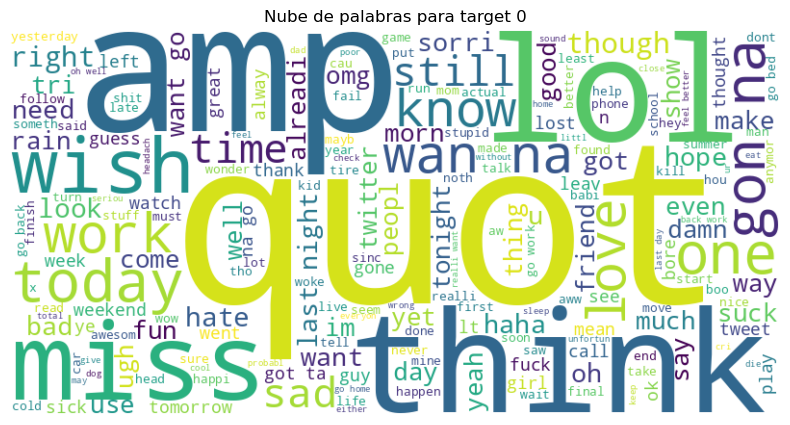

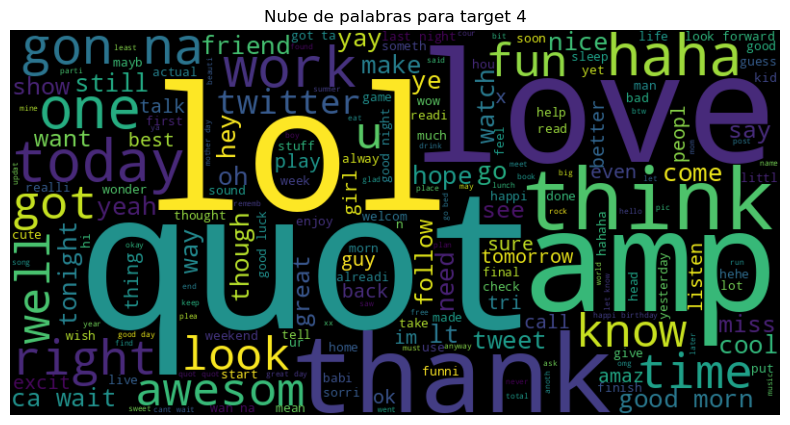

In [8]:
from wordcloud import WordCloud

# Función para generar la nube de palabras
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Supongamos que ya tienes las listas most_common_words_target_0 y most_common_words_target_4
# y también el DataFrame df con la columna 'tweet' que contiene los textos preprocesados

# Paso 1: Convertir el texto preprocesado en una cadena
# Puedes unir todos los textos preprocesados en un solo texto si quieres visualizar todas las palabras juntas
all_text_target_0 = ' '.join(df[df['feeling'] == 0]['clean_tweet'])
all_text_target_4 = ' '.join(df[df['feeling'] == 4]['clean_tweet'])

# Paso 2: Generar la nube de palabras para cada valor de 'target'
generate_wordcloud(all_text_target_0, 'Nube de palabras para target 0', 'white')
generate_wordcloud(all_text_target_4, 'Nube de palabras para target 4', 'black')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['clean_tweet'],df['tweet'],test_size = 0.06, random_state = 42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1504000,), (96000,), (1504000,), (96000,))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear el objeto CountVectorizer
vectorizer = CountVectorizer()

# Vectorizar el conjunto de entrenamiento
x_train_vectorized = vectorizer.fit_transform(x_train)

# Vectorizar el conjunto de prueba
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_vectorized, y_train)
y_pred = tree_model.predict(x_test_vectorized)
print(accuracy_score(y_pred,y_test))